<a href="https://colab.research.google.com/github/bullbearyBots/tensorflow_certification/blob/main/neural_networks_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification

* Binary
* Multiclass
* Multilabel

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
# Our data is little hard to understand right now... let's visualize it
import pandas as pd

circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


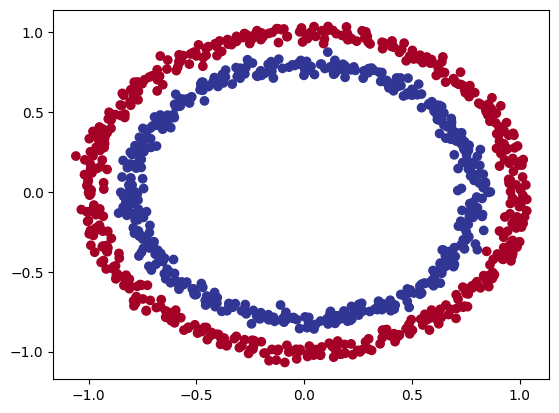

In [ ]:
# Visualize with plot
import matplotlib.pyplot as plt

plt.scatter(circles.X0, circles.X1, c=y, cmap=plt.cm.RdYlBu);

Spend 10 minutes playing around with [playground.tensorflow.org](https://)

## Input and output shapes

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first examples of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [ ]:
import tensorflow as tf

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 7ms/step - loss: 3.1237 - accuracy: 0.4720
Epoch 2/5
32/32 [==============================] - 0s 11ms/step - loss: 0.7643 - accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 0s 10ms/step - loss: 0.7124 - accuracy: 0.4940
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 0.6997 - accuracy: 0.5030
Epoch 5/5
32/32 [==============================] - 0s 7ms/step - loss: 0.6962 - accuracy: 0.4980


In [ ]:
# Let's try and improve our model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around 50% accuracy it's performing as if it's guessing.

So let's step things up a notch and add an extra layer

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.4094 - accuracy: 0.4900
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2363 - accuracy: 0.5270
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.4810
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.4740
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4720
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5010
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.5230
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4680
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5170
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4920
Epoch 11/

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - add more layers or increase the number of hidden units
2. Compile the model - here we might want to choose a different optimization function (Adam)
3. Fitting the model - perhaps we might fit our model for more epochs

In [ ]:
# Set the random seed
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history = model_3.fit(X, y, epochs=50)

Epoch 1/50
32/32 [==============================] - 1s 2ms/step - loss: 3.0623 - accuracy: 0.4670
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7178 - accuracy: 0.4860
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.5100
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.4910
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.4750
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.4350
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.5150
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.5060
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.4820
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4690
Epoch 11/50
32/32 [

In [ ]:
history.history['loss'][-1], history.history['accuracy'][-1]

(0.700132429599762, 0.4659999907016754)

To visualize our model's predictions, let's create a function 'plot_decision_boundary'.
This function will:
* Take in a trained model, features and labels
* Create a meshgrid of different X values
* Make predictions across the meshgrid
* Plot the predictions as well as the line between zones (where each unique class falls)

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
    Plots the decision boundary created by a model prediction on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("Doing multi-class classification")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())



313/313 [==============================] - 1s 3ms/step
Doing binary classification


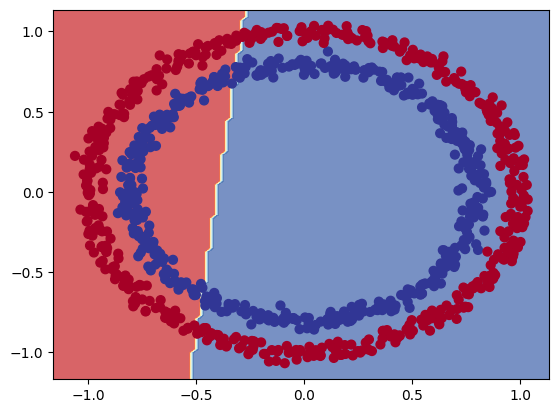

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

In [ ]:
# Let's see if our model can be used for a regression problem

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = x + 100

X_regression, y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [ ]:
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to regression data
#model_3.fit(X_reg_train, y_reg_train, epochs=100)

We need to change the model to suit our data. It's the binary crossentropy loss function.

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 223826.1562 - mae: 419.2377
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 188545.1250 - mae: 376.1653
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 162818.4062 - mae: 340.7533
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 139050.2812 - mae: 310.8669
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 123743.1484 - mae: 290.1901
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 112610.8516 - mae: 275.1629
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 103375.8828 - mae: 261.9798
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 99439.0781 - mae: 256.1128
Epoch 9/100
5/5 [==============================] - 0s 12ms/step - loss: 101639.2031 - mae: 259.5072
Epoch 10/100
5/5 [==============================] - 0s 11ms/step - loss: 100446.5312 - mae: 257.4075
Epoch 11

2/2 [==============================] - 0s 4ms/step


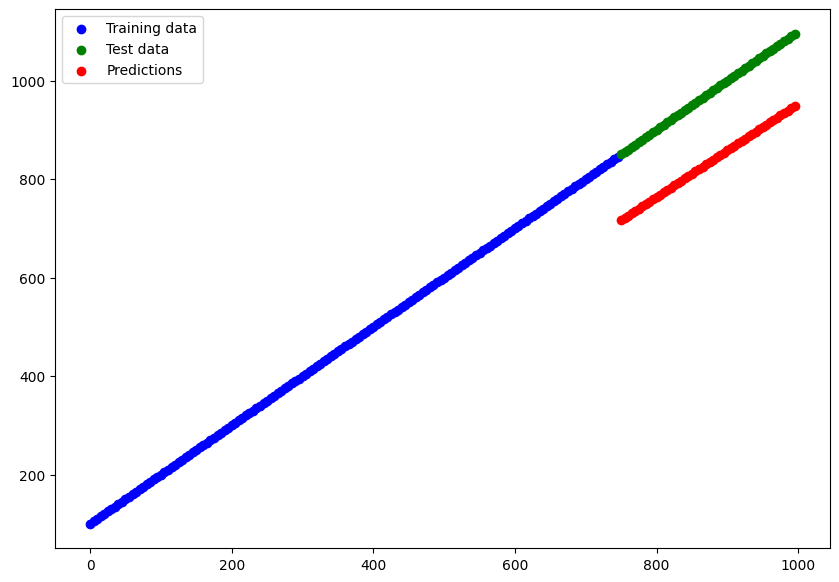

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(tf.expand_dims(X_reg_test, axis=-1))

# Plot the model's predictions against our data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Test data')
plt.scatter(X_reg_test, y_reg_preds, c='r', label='Predictions')
plt.legend();

## The missing piece: non-linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear, input_shape=(None, 1))
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history = model_4.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 4.2189 - accuracy: 0.4977
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 4.1498 - accuracy: 0.4985
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 4.0667 - accuracy: 0.4984
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 4.0307 - accuracy: 0.4992
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 3.9711 - accuracy: 0.4986


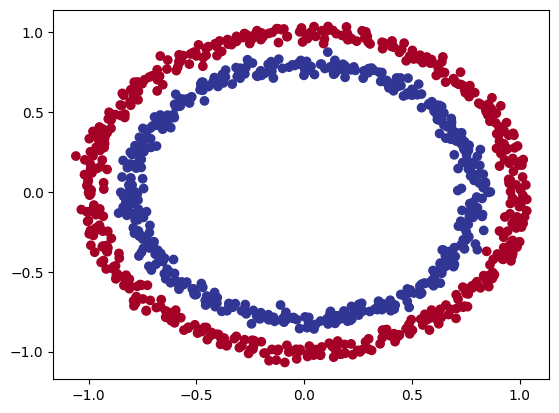

In [ ]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 2ms/step
Doing multi-class classification


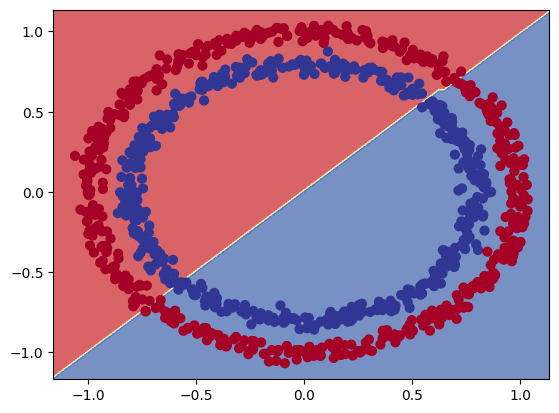

In [ ]:
# Check out our decision boundary
plot_decision_boundary(model_4, X, y)

In [ ]:
# Time to replicate multi-layer neural network from TF playground
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_5.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7171 - accuracy: 0.4950
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7044 - accuracy: 0.4830
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6992 - accuracy: 0.4810
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.4760
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.4740
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4660
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.4800
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.4920
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.4970
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6879 - accuracy: 0.4980
Epoch 11/

In [ ]:
model_5.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0756 - accuracy: 1.0000


[0.07560587674379349, 1.0]

313/313 [==============================] - 1s 2ms/step
Doing binary classification


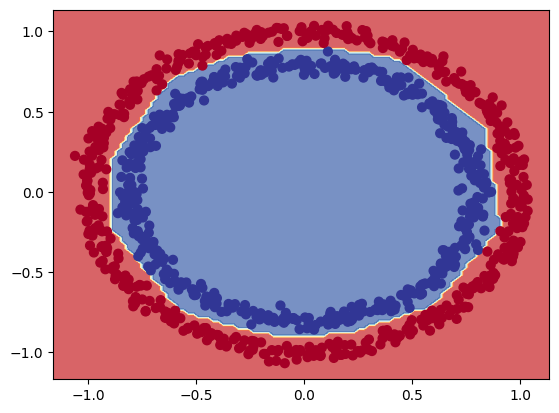

In [ ]:
plot_decision_boundary(model_5, X, y)

In [ ]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

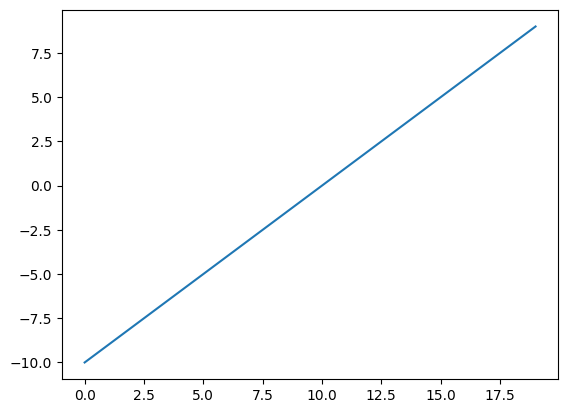

In [ ]:
plt.plot(A)

In [ ]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1+tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

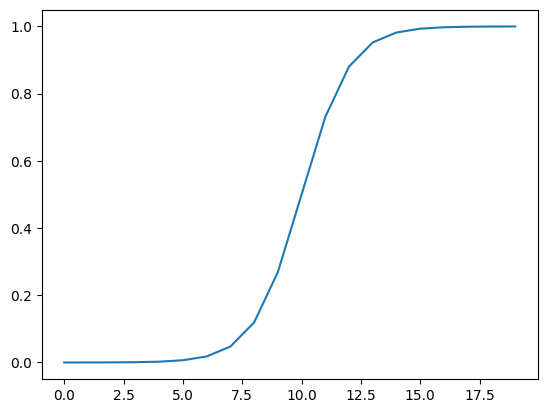

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

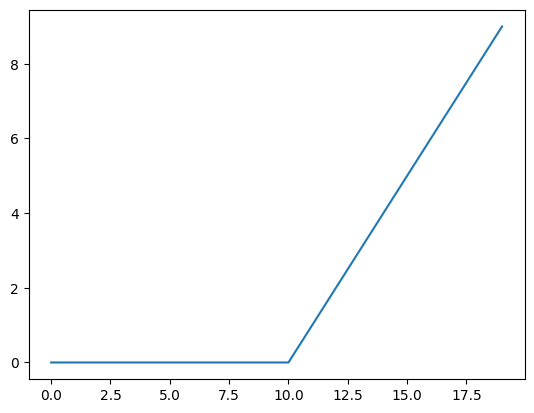

In [ ]:
# Let's replicate relu activation function relu(x) = max(x, 0)
def relu(x):
  return tf.maximum(0, x)

# Plot the relu function
plt.plot(relu(A));

In [ ]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [ ]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification

So far we've been training and testing on the same dataset.
However, in machine learning this is basically a sin.
So let's create a training and test set

In [ ]:
len(X)

1000

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 4ms/step - loss: 0.6810 - accuracy: 0.5362
Epoch 2/25
25/25 [==============================] - 0s 4ms/step - loss: 0.5690 - accuracy: 0.7262
Epoch 3/25
25/25 [==============================] - 0s 4ms/step - loss: 0.3670 - accuracy: 0.8575
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.1636 - accuracy: 0.9712
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.0627 - accuracy: 0.9912
Epoch 6/25
25/25 [==============================] - 0s 4ms/step - loss: 0.0337 - accuracy: 0.9987
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9975
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.0224 - accuracy: 0.9937
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.9975
Epoch 10/25
25/25 [==============================] - 0s 6ms/step - loss: 0.1070 - accuracy: 0.9575
Epoch 11/25
25/25 [

In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 6ms/step - loss: 0.0385 - accuracy: 0.9850


[0.03848398104310036, 0.9850000143051147]

313/313 [==============================] - 1s 3ms/step
Doing binary classification
313/313 [==============================] - 0s 2ms/step
Doing binary classification


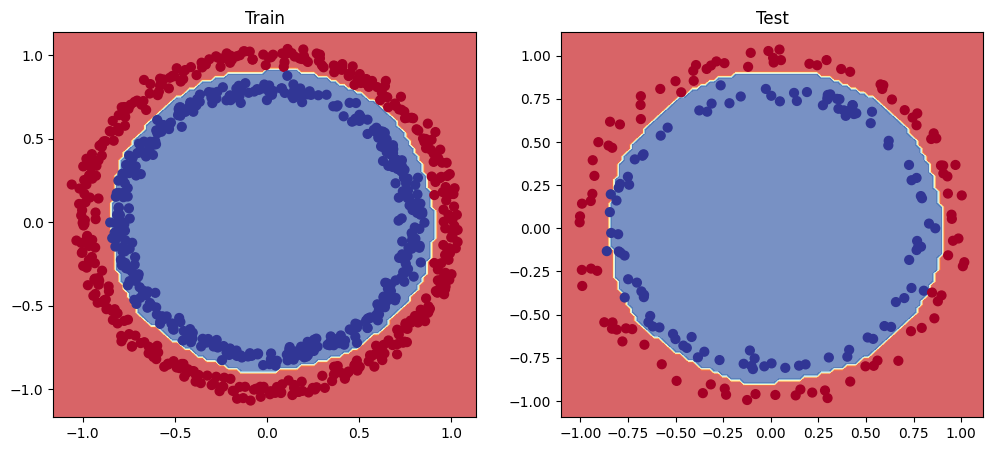

In [ ]:
# Plot the decision boundaries for training and test set
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               384       
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8705 (34.00 KB)
Trainable params: 8705 (34.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Plot the loss (or training) curves

Text(0.5, 1.0, 'Model loss curves')

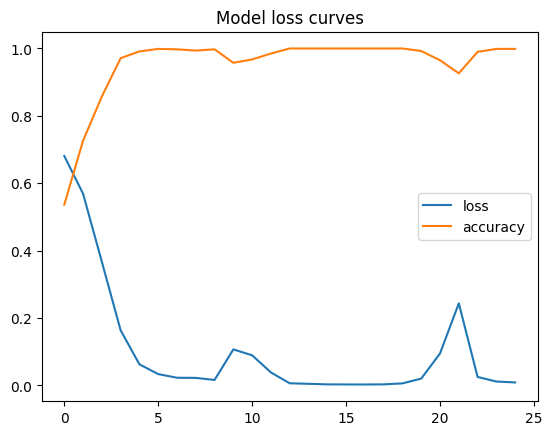

In [ ]:
# Convert the history object into a DataFrame
history_df = pd.DataFrame(history.history)

history_df.plot()
plt.title("Model loss curves")

**Note:** For many problems, the loss function is going down means the model is improving (the predictions it's making are getting closed to ground truth values)

## Find the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:

* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* its training.
* Another model (we could use the same one as above, but we're practicing building model instead)
* A modified loss curves plot

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Creating a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model with callback
history = model_6.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6889 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6867 - accuracy: 0.5000 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6861 - accuracy: 0.5000 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.5000 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5000 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss:

<Axes: xlabel='epochs'>

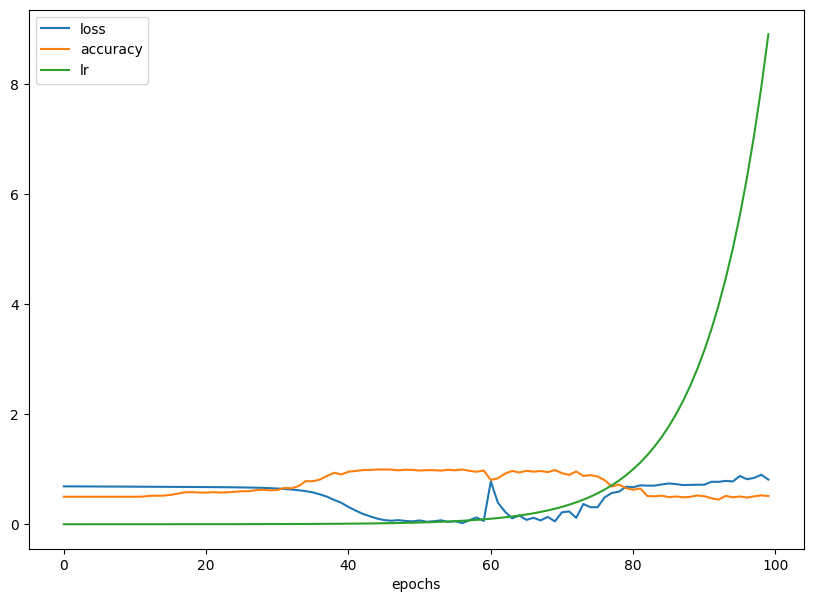

In [ ]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10, 7), xlabel='epochs')

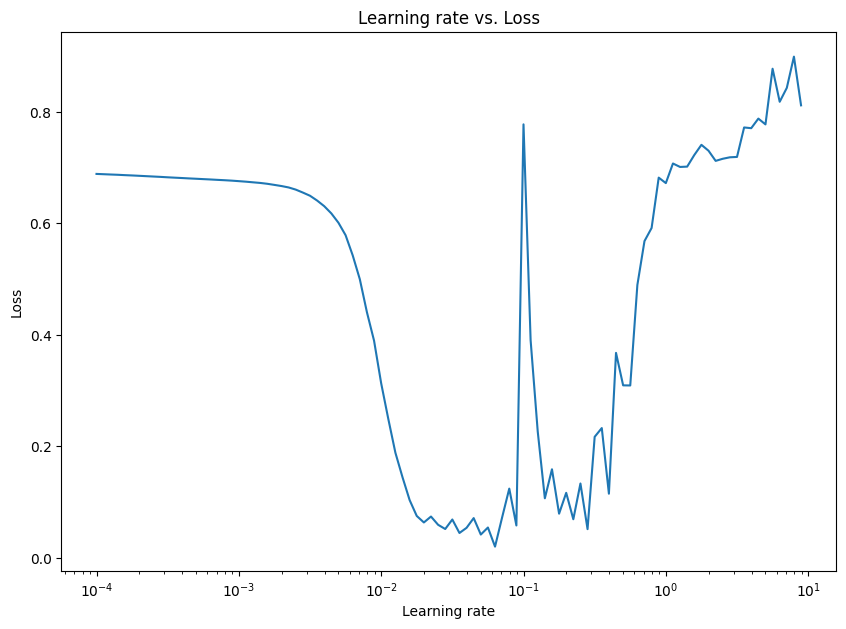

In [ ]:
# Plot the learning rate vs the loss
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss");

## More classification evaluation methods

Alongside visualizing results as much as possible, there are handful of other classification evaluation methods and metrics you should be familiar with.

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report from scikit-learn

In [ ]:
# Check the accuracy of our model
loss, accuracy = model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0385 - accuracy: 0.9850


In [ ]:
# Let's create a confusion matrix
y_pred = model.predict(X_test)
y_pred[:10]

7/7 [==============================] - 0s 3ms/step


array([[9.9944878e-01],
       [5.0817654e-03],
       [9.9935269e-01],
       [1.0690020e-04],
       [9.8737794e-01],
       [9.7280699e-01],
       [1.0420131e-04],
       [1.0928103e-05],
       [9.9569589e-01],
       [1.6670093e-03]], dtype=float32)

In [ ]:
# Convert our predictions to binary format
tf.round(y_pred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, tf.round(y_pred))

array([[100,   0],
       [  3,  97]])

## How about we prettify our confusion matrix?

**Note:** Scikit learn has some plot_confusion_matrix that we are going to replicate for this case

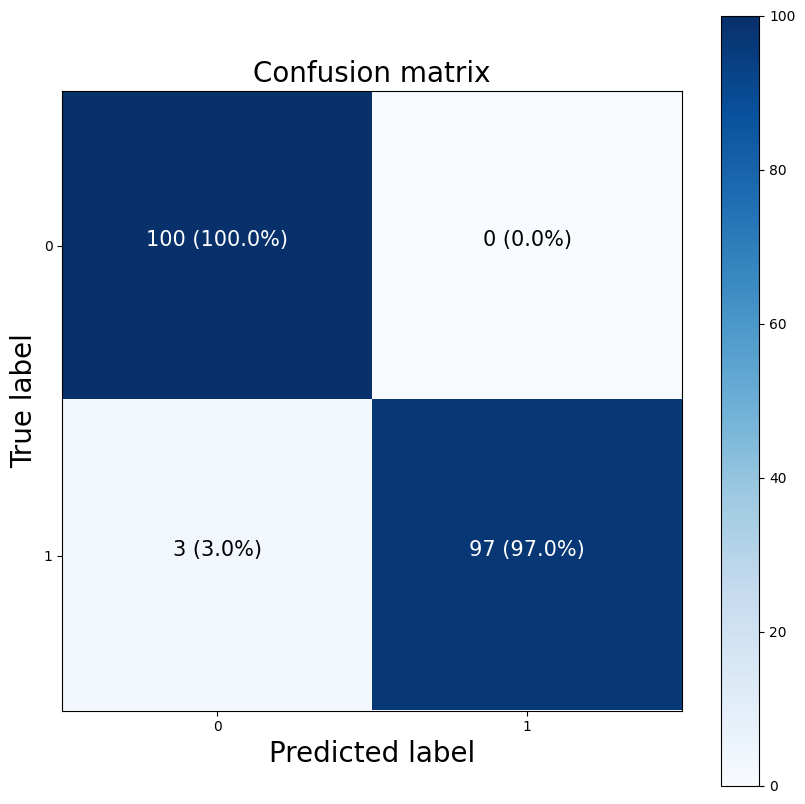

In [ ]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix

n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axis
ax.set(title='Confusion matrix',
       xlabel='Predicted label',
       ylabel='True label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set the x-axis labels to bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
           horizontalalignment='center',
           color='white' if cm[i, j] > threshold else 'black',
           size=15)

In [ ]:
def plot_confusion_matrix(y_test, y_pred, size=20):
  figsize = (10, 10)

  # Create the confusion matrix
  cm = confusion_matrix(y_test, tf.round(y_pred))
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix

  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Create classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axis
  ax.set(title='Confusion matrix',
        xlabel='Predicted label',
        ylabel='True label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set the x-axis labels to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(size)
  ax.xaxis.label.set_size(size)
  ax.title.set_size(size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
            horizontalalignment='center',
            color='white' if cm[i, j] > threshold else 'black',
            size=size)

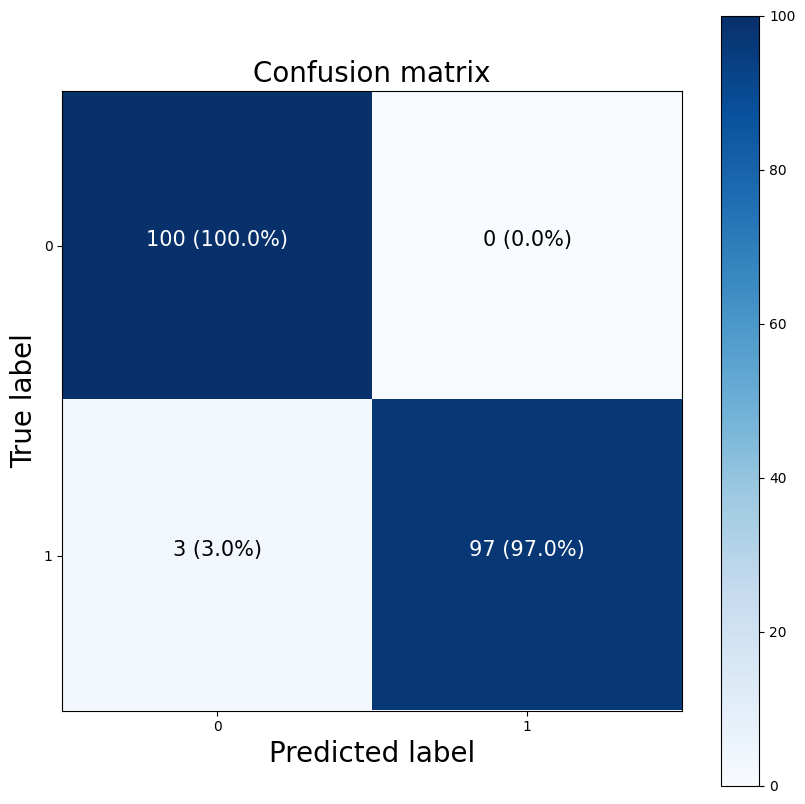

In [ ]:
plot_confusion_matrix(y_test, y_pred)

## Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.
* This means if you have 3 different classes, it's mutli-class classification.
* Also the same if you have 100 of them

To practice multi-class classification we're going to build a neural network to classify images of different items of clothing.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorter into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
# Show the first training example
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training label:\n{train_labels[0]}\n')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

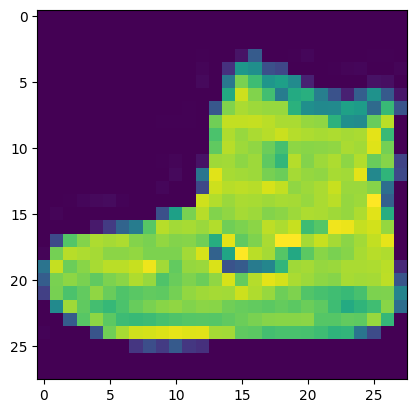

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [ ]:
# Check out samples label
train_labels[0]

9

In [ ]:
# Create a small list so we can index onto our training labels so they're human readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

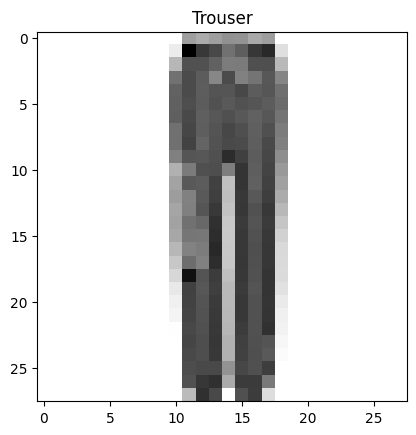

In [ ]:
# Plot an example image and its
index = 1000
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]]);

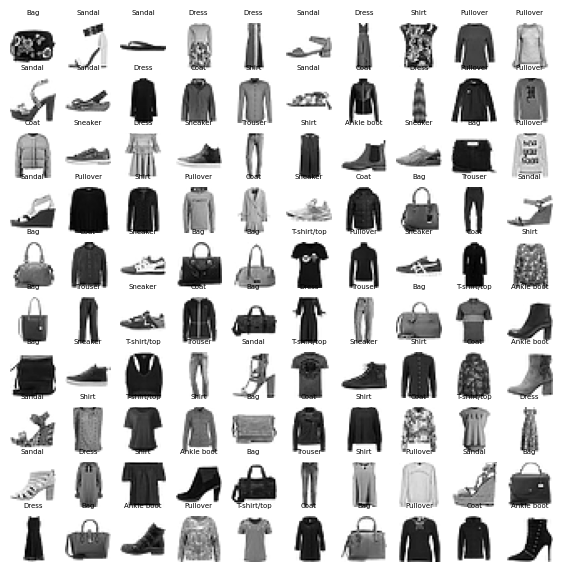

In [ ]:
# Plot multiple random images of Fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(100):
  ax = plt.subplot(10, 10, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]], size=5)
  plt.axis(False)

## Building a multi-class classification model

For our multiclass classification model, we can use a similar architecture to our binary classifiers, however, we're going to have a bit of changes:
* Input_shape = 28x28 image
* Output_shape = 10 for every type
* Loss function - categorical crossentropy
* Output activation - softmax

**Note:** If your labels are one hot encoded use CategoricalCrossentropy and if they're in the integer form use SparseCategoricalCrossentropy


In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

non_norm_history = model.fit(train_data,
                             train_labels,
                             epochs=10,
                             validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3651 - accuracy: 0.0999 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3027 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy:

In [ ]:
# Check the model summary
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_48 (Dense)            (None, 4)                 3140      
                                                                 
 dense_49 (Dense)            (None, 4)                 20        
                                                                 
 dense_50 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (normalized) which means they like to have numbers in the tensors between 0 and 1.

In [ ]:
# We can get out training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [ ]:
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

norm_history = model.fit(train_data_norm,
                             train_labels,
                             epochs=50,
                             validation_data=(test_data_norm, test_labels))

Epoch 1/50
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5434 - accuracy: 0.8053 - val_loss: 0.4813 - val_accuracy: 0.8295
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4524 - accuracy: 0.8399 - val_loss: 0.5104 - val_accuracy: 0.8247
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4263 - accuracy: 0.8468 - val_loss: 0.4847 - val_accuracy: 0.8321
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4118 - accuracy: 0.8556 - val_loss: 0.4649 - val_accuracy: 0.8275
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4069 - accuracy: 0.8550 - val_loss: 0.4537 - val_accuracy: 0.8405
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3933 - accuracy: 0.8599 - val_loss: 0.4599 - val_accuracy: 0.8350
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3900 - accuracy: 0.8617 - val_loss: 0.4546 - val_accuracy

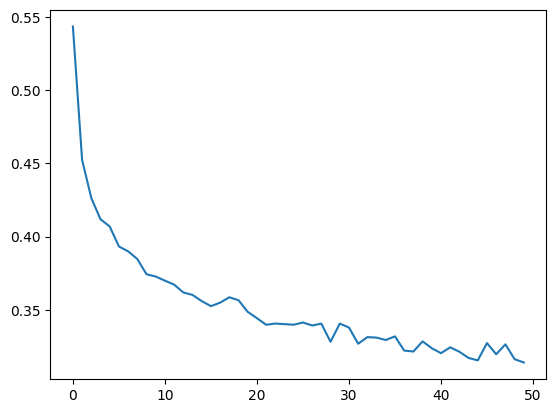

In [ ]:
plt.plot(norm_history.history['loss'])

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_2.fit(train_data_norm,
                              train_labels,
                              epochs=40,
                              validation_data=(test_data_norm, test_labels),
                              callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 10s 5ms/step - loss: 1.2799 - accuracy: 0.5175 - val_loss: 0.9602 - val_accuracy: 0.6269 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8964 - accuracy: 0.6628 - val_loss: 0.8878 - val_accuracy: 0.6679 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8402 - accuracy: 0.6786 - val_loss: 0.8300 - val_accuracy: 0.6710 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7980 - accuracy: 0.6973 - val_loss: 0.7908 - val_accuracy: 0.7092 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7314 - accuracy: 0.7361 - val_loss: 0.7230 - val_accuracy: 0.7492 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6933 - accuracy: 0.7518 - val_loss: 0.6962 - val_accuracy: 0.7560 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 

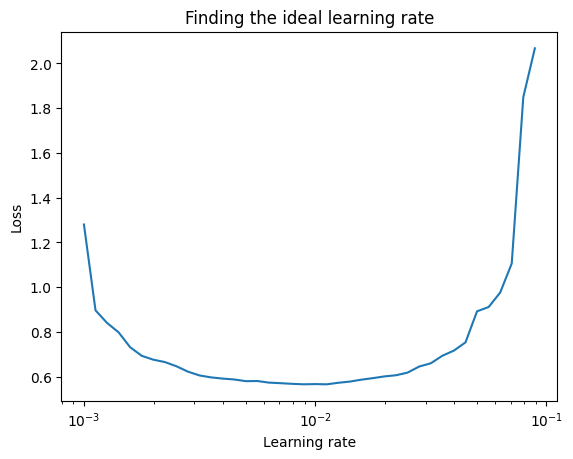

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))

plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate');

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
                metrics=['accuracy'])

find_lr_history = model_3.fit(train_data_norm,
                              train_labels,
                              epochs=100)

Epoch 1/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4863 - accuracy: 0.8241
Epoch 2/100
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3696 - accuracy: 0.8647
Epoch 3/100
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3383 - accuracy: 0.8741
Epoch 4/100
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3169 - accuracy: 0.8833
Epoch 5/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3008 - accuracy: 0.8880
Epoch 6/100
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2870 - accuracy: 0.8913
Epoch 7/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2769 - accuracy: 0.8960
Epoch 8/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2695 - accuracy: 0.8992
Epoch 9/100
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2605 - accuracy: 0.9018
Epoch 10/100
1875/1875 [==============================] - 13s 7m

In [ ]:
# Evaluating our multiclass classification model
model_3.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.8089 - accuracy: 0.8840


[0.8088952898979187, 0.8840000033378601]

## Evaluate our multi-class classification model

* Evaluate performnce using other classification metrics
* Assess some of its predictions through visualizations
* Improve its results by training it for longer or changing the architecture
* Save and export it for use in an application

In [ ]:
# Create a confusion matrix
y_probs = model_3.predict(test_data_norm)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([1.4011762e-27, 2.9369725e-33, 1.5397408e-29, 1.8189760e-23,
        2.5497296e-26, 1.6898893e-07, 2.8998959e-21, 3.0533476e-05,
        3.0708121e-19, 9.9996918e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

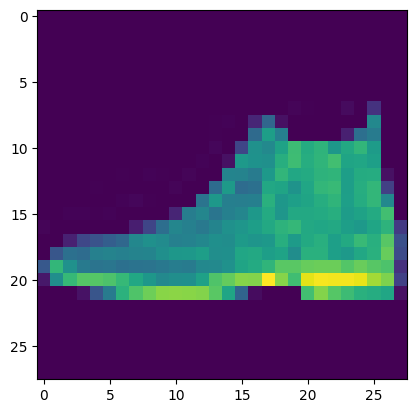

In [ ]:
plt.imshow(test_data_norm[0])

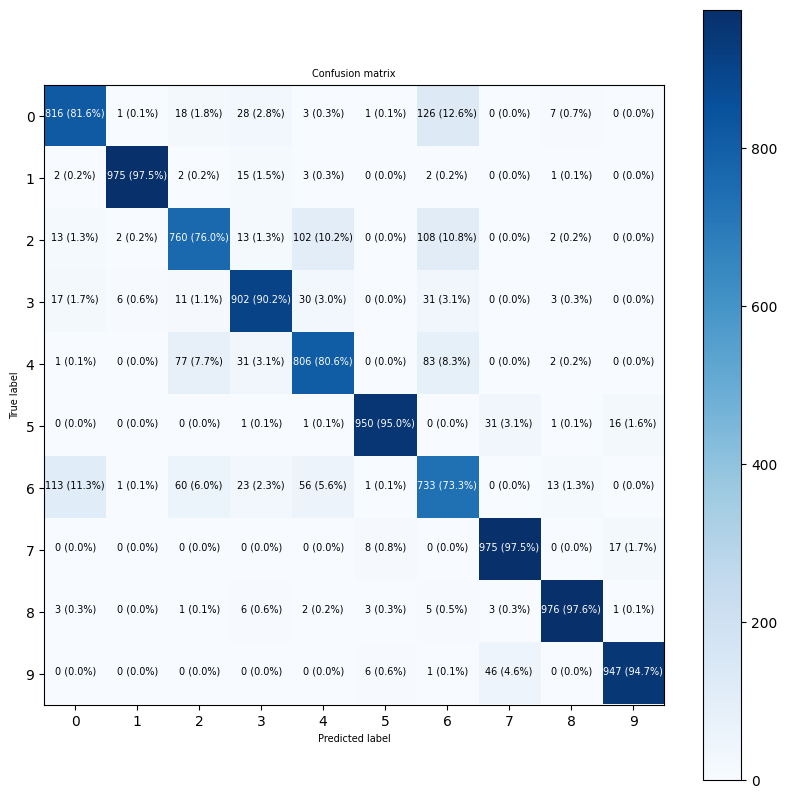

In [ ]:
y_preds = y_probs.argmax(axis=1)

plot_confusion_matrix(test_labels, y_preds, size=7)

**Note:** Often when working with images and other forms of visual data it's a good idea to visualize as much as possible to develop further understanding of the data and of the inputs and outputs of your models

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label and the predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and
  truth label.
  """

  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is true or false
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)





1/1 [==============================] - 0s 21ms/step


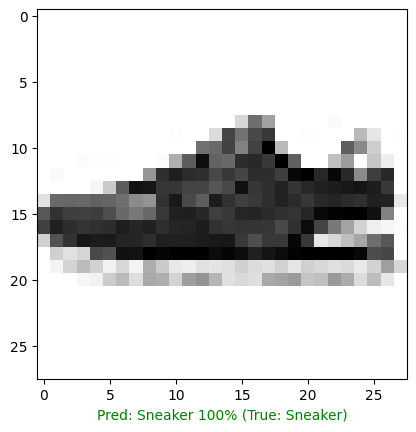

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_3,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?

In [ ]:
# Find the layers of our most recent model (model_3)
model_3.layers

In [ ]:
# Extract a particular layer
model_3.layers[1]

In [ ]:
# Get the patterns of the layer in our network
weights, biases = model_3.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[-0.08079074, -0.9063459 ,  0.07549647, ...,  1.7750152 ,
         -0.13066876, -1.31358   ],
        [-0.00646586, -2.2893465 , -0.06207179, ...,  1.5307633 ,
         -0.8160076 , -1.0207387 ],
        [-0.06717689,  1.2724324 , -0.02873151, ...,  0.09480984,
         -0.76151544, -3.0897036 ],
        ...,
        [-0.00650727,  1.1305073 ,  0.01501064, ..., -0.7743345 ,
         -1.0666429 ,  0.7788986 ],
        [-0.06738757,  0.04589666,  0.0104467 , ...,  0.6152493 ,
         -1.6918949 ,  0.9030006 ],
        [-0.01923815,  0.67932075, -0.02741183, ...,  1.4068348 ,
          0.02954202,  2.2172732 ]], dtype=float32),
 (784, 128))

In [ ]:
model_3.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_78 (Dense)            (None, 128)               100480    
                                                                 
 dense_79 (Dense)            (None, 64)                8256      
                                                                 
 dense_80 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Bias and biases shapes
biases, biases.shape

(array([-2.43056845e-03,  1.04706275e+00, -1.36587266e-02, -4.61126894e-01,
        -8.33070099e-01,  1.33073783e+00, -2.66491622e-01, -1.51551506e-02,
         1.27458000e+00, -2.54777279e-02,  2.70901863e-02,  9.26044762e-01,
        -1.11818723e-02,  2.51203150e-01, -3.16910601e+00, -2.36684942e+00,
        -6.54056311e-01, -3.87407809e-01, -2.19733906e+00,  5.86180329e-01,
         7.27846265e-01, -1.19573325e-02,  7.50622392e-01, -2.44944334e+00,
        -1.14811240e-02,  6.79193377e-01,  1.38222098e+00,  1.21424210e+00,
         2.16603398e-01,  1.41123724e+00,  1.55153978e+00,  1.13150990e+00,
        -1.90349557e-02,  7.83976555e-01,  5.75412691e-01, -1.37765944e-01,
        -3.41494828e-02,  1.70931542e+00, -4.57641929e-01,  2.75095850e-01,
         2.28930637e-01, -6.67616606e-01, -2.80005193e+00, -2.06341520e-01,
         2.41318554e-01,  1.82657218e+00,  1.20636606e+00, -1.52087957e-02,
         6.29584193e-01, -2.85567045e-01, -4.88736391e-01,  2.13515306e+00,
         1.8

Every neuron has a biased vector. Each of these is paired with a weights matrix.

The bias vector gets initialized as zeros at least in the case of a Tensorflow Dense layer.

Thw bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

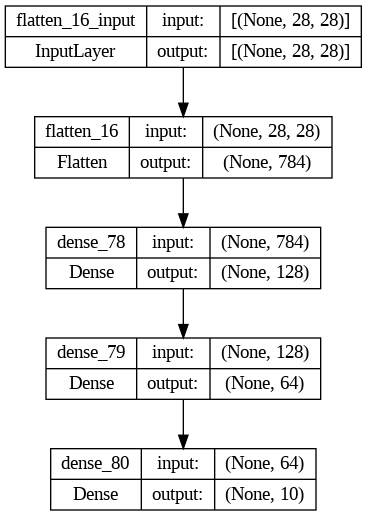

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_3, show_shapes=True)